In [228]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [229]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [230]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [231]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [232]:



df = getQuotes(frameM30)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1577817000,1.12215,1.12308,1.12215,1.12260,1972,7,0
1,1577818800,1.12261,1.12270,1.12224,1.12255,1278,7,0
2,1577820600,1.12255,1.12290,1.12230,1.12285,925,8,0
3,1577822400,1.12287,1.12287,1.12234,1.12241,631,7,0
4,1577824200,1.12242,1.12250,1.12222,1.12229,342,8,0
...,...,...,...,...,...,...,...,...
45701,1693324800,1.07919,1.07961,1.07819,1.07840,4317,9,0
45702,1693326600,1.07840,1.08061,1.07832,1.08033,5503,9,0
45703,1693328400,1.08033,1.08499,1.08033,1.08454,14336,9,0
45704,1693330200,1.08454,1.08456,1.08225,1.08275,8251,9,0


In [233]:



def averageDirectionalIndex(df = None, lookBackPeriod = 14):
    df['atr'] = ta.atr(high=df['high'], low=df['low'], close=df['close'], length=lookBackPeriod)
    adx = ta.adx(high=df['high'], low=df['low'], close=df['close'], length=lookBackPeriod)
    df['adx'] = adx[f'ADX_{lookBackPeriod}']
    df['di+'] = adx[f'DMP_{lookBackPeriod}']
    df['di-'] = adx[f'DMN_{lookBackPeriod}']
    return df





In [234]:






lookBackPeriod = 14
adxThreshold = 25


df = averageDirectionalIndex(df, lookBackPeriod)

df = df.dropna()

df






,time,open,high,low,close,tick_volume,spread,real_volume,atr,adx,di+,di-
27,1577952000,1.12040,1.12066,1.12039,1.12050,512,7,0,0.000467,28.104747,18.894542,37.419901
28,1577953800,1.12050,1.12073,1.12034,1.12070,406,8,0,0.000460,28.287439,18.829106,34.831037
29,1577955600,1.12074,1.12097,1.12052,1.12061,1030,7,0,0.000460,27.394074,21.560563,32.073709
30,1577957400,1.12066,1.12099,1.12039,1.12095,926,8,0,0.000471,26.968995,19.359923,31.011485
31,1577959200,1.12095,1.12134,1.12049,1.12070,1267,7,0,0.000501,25.248493,22.299434,26.833069
...,...,...,...,...,...,...,...,...,...,...,...,...
45701,1693324800,1.07919,1.07961,1.07819,1.07840,4317,9,0,0.000939,28.718606,9.593263,29.780201
45702,1693326600,1.07840,1.08061,1.07832,1.08033,5503,9,0,0.001036,28.468577,14.975747,25.076103
45703,1693328400,1.08033,1.08499,1.08033,1.08454,14336,9,0,0.001294,28.642881,35.294572,18.627800
45704,1693330200,1.08454,1.08456,1.08225,1.08275,8251,9,0,0.001367,28.804734,31.034293,16.379307


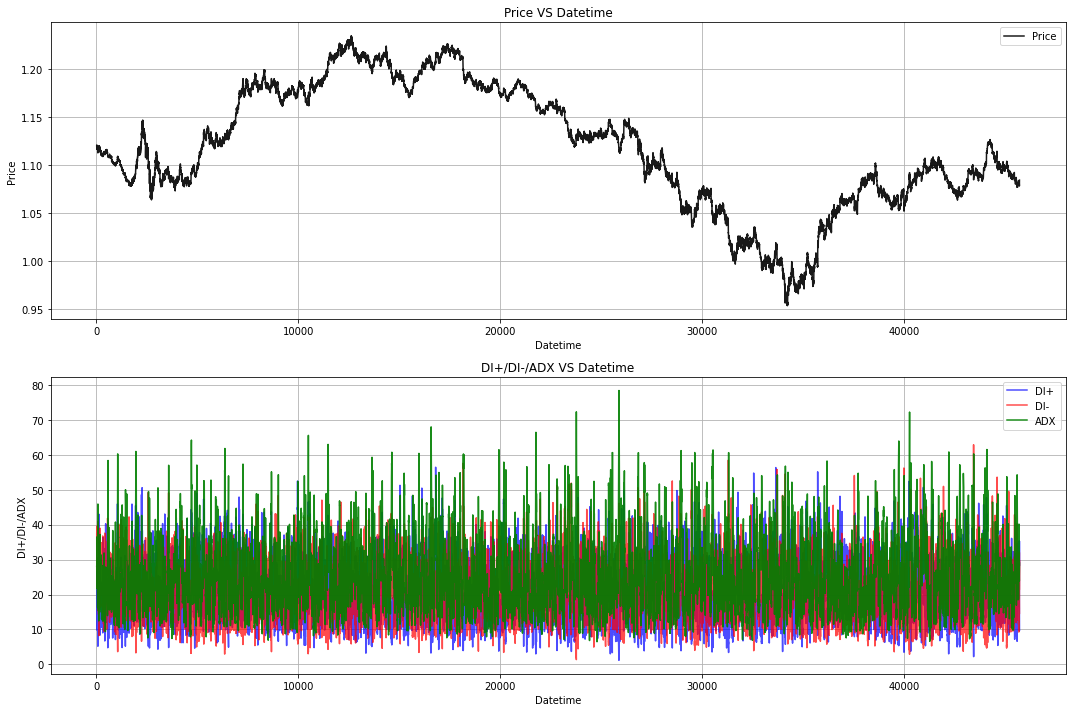

In [235]:







plt.figure(figsize = (15, 10))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], label='Price', color='black', alpha=0.9)

plt.title('Price VS Datetime')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(df.index, df['di+'], label='DI+', color='blue', alpha=0.7)
plt.plot(df.index, df['di-'], label='DI-', color='red', alpha=0.7)
plt.plot(df.index, df['adx'], label='ADX', color='green', alpha=0.9)
plt.title('DI+/DI-/ADX VS Datetime')
plt.xlabel('Datetime')
plt.ylabel('DI+/DI-/ADX')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()









## Strategy

- However we are demonstrating the use of this strategy on individual basis.
- But this strategy should always be used in combination with other strategies to generate proper signals.
- Buy Signal -> Whenever the ADX line crosses from below to above 25 and the - DI line is above the + DI line.
- Above condition would specify that the downtrend is there, so we are trying to buy the dip actually.
- Sell Signal -> Whenever the closing price >= 1 % of buyPrice.
- There is also another strategy used with this indicator , please have a look here - https://medium.com/codex/algorithmic-trading-with-average-directional-index-in-python-2b5a20ecf06a





In [236]:





buyIndices = []
sellIndices = []
buys = []
sells = []
openPosition = None
targetPrice = None
pctRise = 0.01


for i in range(len(df)):
    if (i > 0) and (openPosition is None) and (df.iloc[i]['adx'] > 25) and (df.iloc[i - 1]['adx'] < 25) and (df.iloc[i]['di-'] > df.iloc[i]['di+']):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
        targetPrice = df.iloc[i]['close'] + (pctRise * df.iloc[i]['close'])
    elif (i > 0) and (openPosition) and (
        (targetPrice) and
        (df.iloc[i]['close'] >= targetPrice)
    ):
        openPosition = None
        targetPrice = None
        holdCounter = 0
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])




In [237]:


print(buys)
print(sells)



[1.11979, 1.13407, 1.17157, 1.1727, 1.18324, 1.18542, 1.18052, 1.21367, 1.22078, 1.22536]
[1.13226, 1.14617, 1.1838, 1.18561, 1.19568, 1.1991, 1.19236, 1.22583, 1.23392]


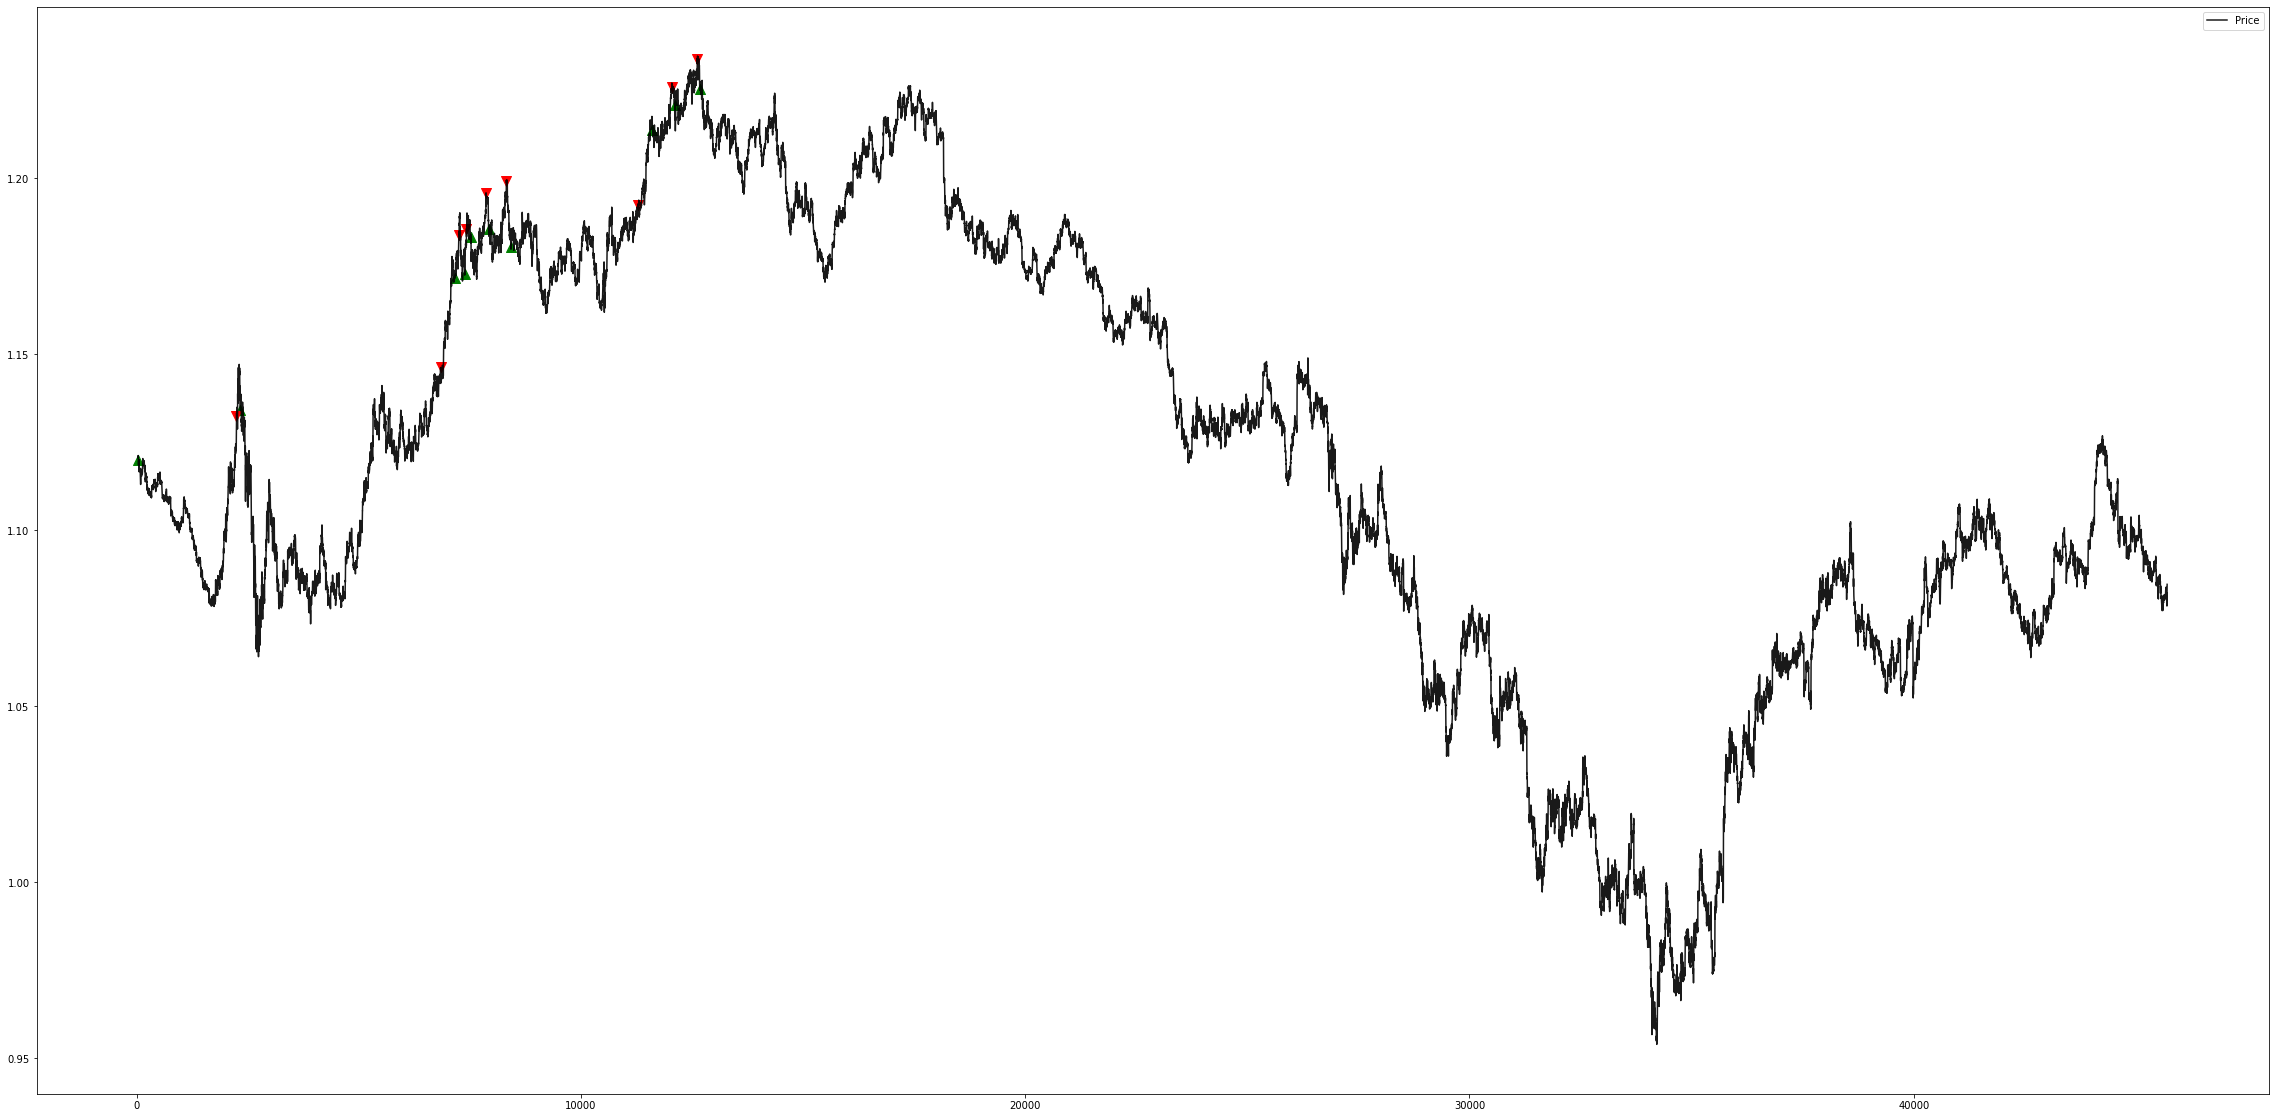

In [238]:











## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='black', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()














In [239]:






# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None
maximumPercentageWin = None
maximumPercentageLoss = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]
    maximumValue = max(sells[i], buys[i])
    netResult = netResult - (0.002 * maximumValue);
    percentageWinOrLoss = (netResult / maximumValue) * 100
    message = None

    if netResult < 0:
        loseTrades += 1
        message = f'Lost {percentageWinOrLoss}'
    else:
        winTrades += 1
        message = f'Win {percentageWinOrLoss}'

    if not maximumWin or netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose or netResult < maximumLose:
        maximumLose = netResult

    if not maximumPercentageWin or percentageWinOrLoss > maximumPercentageWin:
        maximumPercentageWin = percentageWinOrLoss

    if not maximumPercentageLoss or percentageWinOrLoss < maximumPercentageLoss:
        maximumPercentageLoss = percentageWinOrLoss

    totalPL = totalPL + netResult
    print(message)

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')
print(f'Maximum Percentage Win = {maximumPercentageWin}')
print(f'MaximumPercentage Loss = {maximumPercentageLoss}')






Win 0.9013371487114249
Win 0.8556898191367772
Win 0.8331137016387871
Win 0.8888909506498744
Win 0.8404121504081364
Win 0.9408556417313099
Win 0.7929886946895294
Win 0.7919809435239755
Win 0.8648988589211563
Total P & L = 0.09158054000000002
Win Trades = 9
Lose Trades = 0
Maximum Win = 0.011281800000000137
Maximum Lose = 0.009455280000000073
Maximum Percentage Win = 0.9408556417313099
MaximumPercentage Loss = 0.7919809435239755
